# Sampling field phasors from quadrature uncertainty
# Plotting field envelops

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import qutip as qt
from qutip import Qobj

In [2]:
def generate_data(E0,phi,DX1=0.5,DX2=0.5,n=10,covar=None): # generate samples within an uncertainty region
    ephasor = E0*np.exp(1j*phi)
    mean = np.array([ephasor.real,ephasor.imag])
    cov = np.array([[DX1,0],[0,DX2]]) if covar.any()==None else covar
    X = np.random.multivariate_normal(mean,cov,n)
    return X

def plot_quadratures(X,E0,phi,Dx1=0.5,Dx2=0.5,covar=None): # plotting the quadratures
    a = E0*np.exp(1j*phi)
    mean = np.array([a.real,a.imag])
    rmax = 0
    for i in range(X.shape[0]):
        rmax = max(rmax,np.sqrt((mean[0]-X[i][0])**2+(mean[1]-X[i][1])**2))
    fig = plt.figure(figsize=(5,5))

    plt.scatter(X[:,0],X[:,1])
    if(type(covar)==type(None)):
        plt.title(r'Random samples within the uncertain region of the quadratures. $\Delta X1={}, \Delta X2={}$'.format(Dx1,Dx2))
    else:
        plt.title(r'Random samples within the uncertain region of the quadratures. $\Delta X1={}, \Delta X2={}$'.format(covar[0][0],covar[1][1]))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.quiver(0,0,a.real,a.imag,units='xy', scale=1)

    plt.xlim(0,max(X[:,0])+2)
    plt.ylim(0,max(X[:,1])+2)
    plt.grid()
    plt.show()
#     return fig
    
def generate_ampSqezdStates(X,E0,phi): # Transforming phase squeezed states to amplitude squeezed states
    ephasor = E0*np.exp(1j*phi)
    mean = np.array([ephasor.real,ephasor.imag])
    
    Xa = np.zeros(X.shape[0],dtype=complex)
    X_ = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xa[i] = (X[i][0]-mean[0] + 1j*(X[i][1]-mean[1]))*np.exp(1j*np.pi/2)
    for i in range(X.shape[0]):
        X_[i] = np.array([Xa[i].real+mean[0],Xa[i].imag+mean[1]])
    return X_
    

## Data


In [3]:
E0=5 # Field amplitude sample
phi=np.pi/4 # Field phase sample


covar_phase_squeezed = 0.5*np.array([[1,0.9],[0.9,1]]) # covariance of gaussian generating points in uncertainty region 

Xp  = generate_data(E0,phi,covar=covar_phase_squeezed,n=100) # phase squeezed states
Xa = generate_ampSqezdStates(Xp,E0,phi) # amplitude squeezed states

In [4]:
def plot_sampledFields(X): # Plotting the field envelopes after sampling points from the quadrature uncertainty of the  
                           # given sample field
    N=2
    w = 2*np.pi
    T=2*np.pi/w
    times = np.linspace(0,N*T,100*N)
    fields = []
    
    for x in X:
        phasor_ = x[0]+1j*x[1]
        A = np.abs(phasor_)
        phi__ = np.angle(phasor_)
        fields.append(A*np.cos(w*times+phi__))
    for f in fields:
        plt.plot(times,f)
    plt.title('Sampled fields from quadrature uncertainty')
    plt.xlabel('t')
    plt.ylabel('E')
    plt.show()
        

In [5]:
def AP_statistics(X): # Generate statistics of the points sampled from the uncertainty region
    amplitudes = []
    phases = []
    for x in X:
        phasor = x[0]+1j*x[1]
        amplitudes.append(np.abs(phasor))
        phases.append(np.angle(phasor))
    print(f'Amplitudes vary from {min(amplitudes)} to {max(amplitudes)}')
    print(f'Mean amplitude = {np.mean(amplitudes)}, Variance = {np.var(amplitudes)}')
    print(f'Phases vary from {min(phases)} to {max(phases)}')
    print(f'Mean phase = {np.mean(phases)}, Variance = {np.var(phases)}')
          
print('For amplitude squeezed states:\n')
AP_statistics(Xa)
print('\n')
print('For phase squeezed states:\n')
AP_statistics(Xp)
        

For amplitude squeezed states:

Amplitudes vary from 4.571219396356151 to 6.080667499243072
Mean amplitude = 5.076239764365838, Variance = 0.07246845660681184
Phases vary from 0.3203202820060952 to 1.2383969238702535
Mean phase = 0.809802654254251, Variance = 0.032704024011312366


For phase squeezed states:

Amplitudes vary from 2.4244128793317508 to 7.675530148152128
Mean amplitude = 5.119453014996478, Variance = 0.8969935850286739
Phases vary from 0.662158816331164 to 0.8752622860389973
Mean phase = 0.785633674369686, Variance = 0.0018543686883887472


## Quadrature plots

Amplitude squeezed states (Have phase variation):


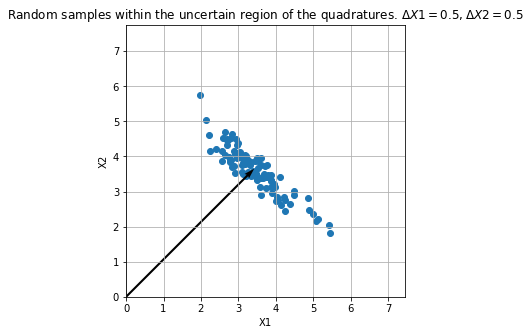

Phase squeezed states (Have amplitude variation):


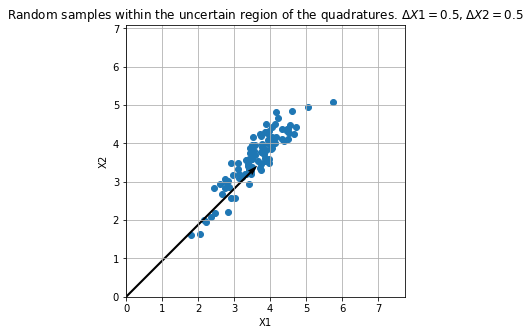

In [6]:
print('\033[1m'+'Amplitude squeezed states (Have phase variation):')
plot_quadratures(Xa,E0,phi)
print('\033[1m'+'Phase squeezed states (Have amplitude variation):')
plot_quadratures(Xp,E0,phi)

## Plotting the sampled field envelopes

Amplitude squeezed states (Have phase variation):


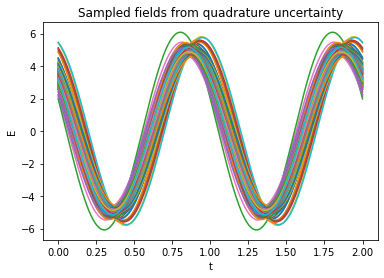

Phase squeezed states (Have amplitude variation):


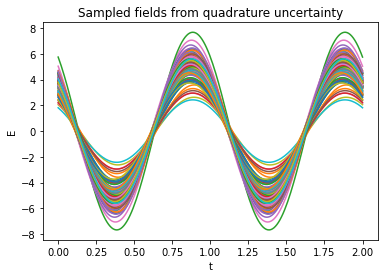

In [7]:
print('\033[1m'+'Amplitude squeezed states (Have phase variation):')
plot_sampledFields(Xa)

print('\033[1m'+'Phase squeezed states (Have amplitude variation):')
plot_sampledFields(Xp)

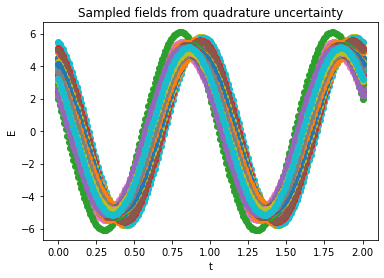

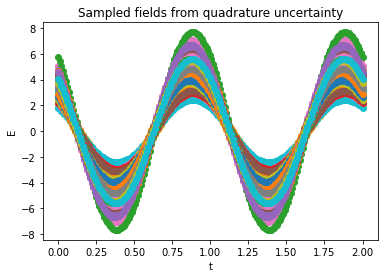

In [16]:
X = Xa
N=2
w = 2*np.pi
T=2*np.pi/w
times = np.linspace(0,N*T,100*N)
fields = []

for x in X:
    phasor_ = x[0]+1j*x[1]
    A = np.abs(phasor_)
    phi__ = np.angle(phasor_)
    fields.append(A*np.cos(w*times+phi__))
for f in fields:
    plt.scatter(times,f)
plt.title('Sampled fields from quadrature uncertainty')
plt.xlabel('t')
plt.ylabel('E')
plt.show()

X = Xp
N=2
w = 2*np.pi
T=2*np.pi/w
times = np.linspace(0,N*T,100*N)
fields = []

for x in X:
    phasor_ = x[0]+1j*x[1]
    A = np.abs(phasor_)
    phi__ = np.angle(phasor_)
    fields.append(A*np.cos(w*times+phi__))
for f in fields:
    plt.scatter(times,f)
plt.title('Sampled fields from quadrature uncertainty')
plt.xlabel('t')
plt.ylabel('E')
plt.show()